In [11]:
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [12]:
bigLUT = np.load('data/ownlutv2.npy')
d = np.load('data/ownlutAxesv2.npz')
energies = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

[18394.43878594 10831.28451788 10437.55199817 10330.78189021
 10286.84479593 10264.55894615 10251.71393446 10243.63959707
 10238.23464688 10234.43959068 10231.67299311 10229.59411265
 10227.99250066 10226.73247322 10225.72335692 10224.90268845]
[0.69222906 0.97662118 0.99128924 0.99569759 0.99726119 0.99807919
 0.9986401  0.99886373 0.99911638 0.9993043  0.99931129 0.99940934
 0.99957546 0.99964726 0.99969379 0.99973182]


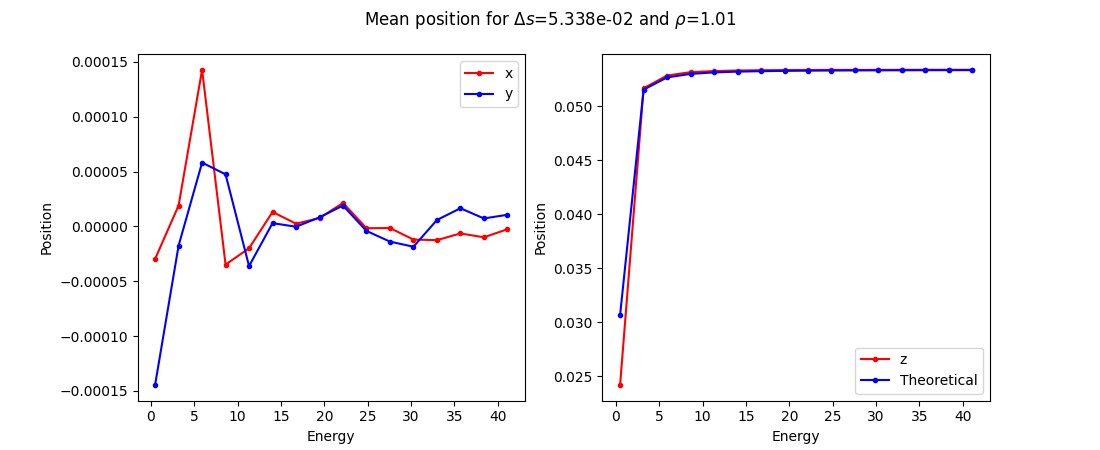

In [13]:
from electronTransportCode.Material import Material
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron

# Average x, y and z position
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Theoretical average step
particle = SimplifiedEGSnrcElectron()
stepsize = stepsizeArray[stepsizeIndex]
material = Material(rho=densityArray[densityIndex])
EcostArray = np.array([particle.getMeanMu(energy, stepsize, material) for energy in energies], dtype=float)

stepsizeDsArray = stepsize*np.array([particle.getScatteringRate(None, energy, material) for energy in energies], dtype=float)
expSum: float = 1.0 - np.exp(stepsizeDsArray*(EcostArray - 1.0))
A_coef = EcostArray*stepsize*expSum/((1 - EcostArray)*stepsizeDsArray)

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 1], '.-r', label=f'x')
ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 2], '.-b', label=f'y')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Position')
ax1.legend()

ax2.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 3], '.-r', label=f'z')
ax2.plot(energies, A_coef, '.-b', label=f'Theoretical')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Position')
ax2.legend()
# Discrepancy at lower energies due to energy dependence that is ignored by the formula.

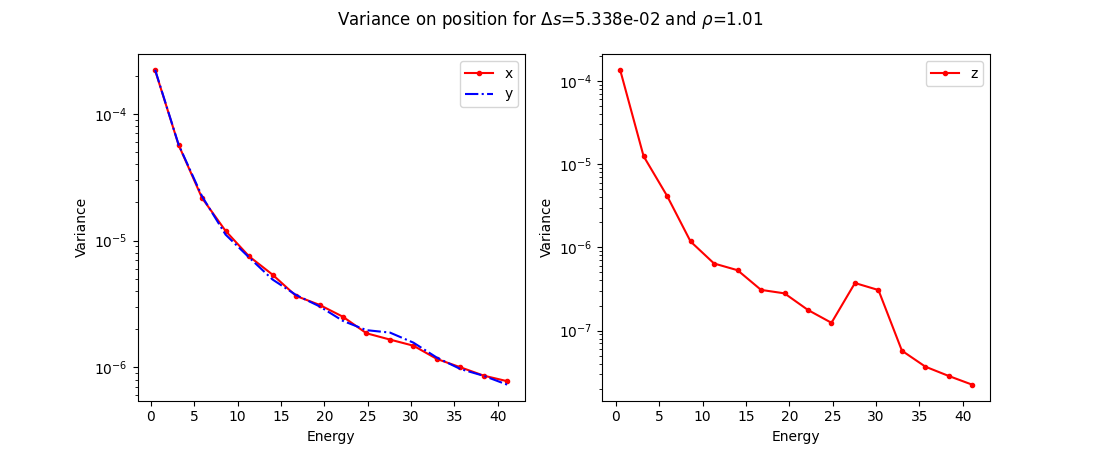

In [14]:
# Average x, y and z position
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 4], '.-r', label=f'x')
ax1.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 5], '-.b', label=f'y')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 6], '.-r', label=f'z')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Variance')
ax2.legend()

# Little noise on variance

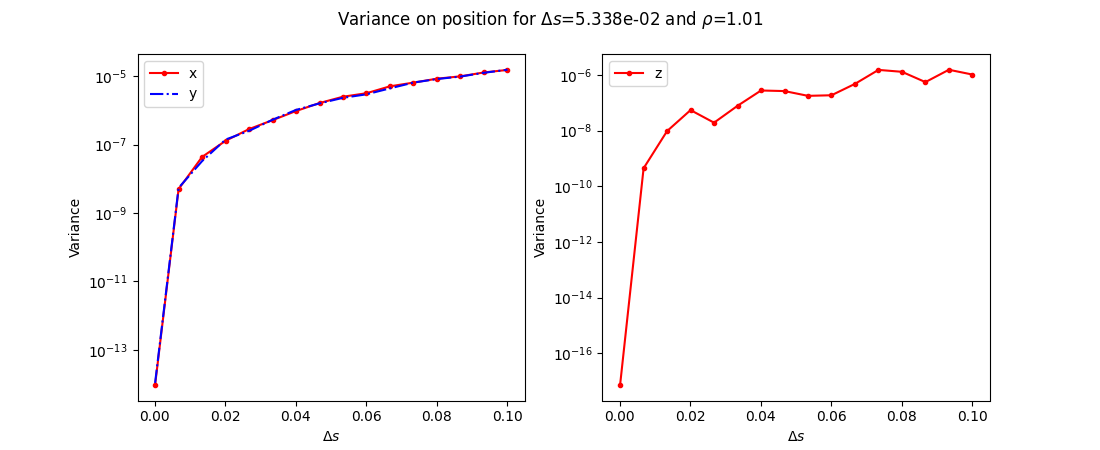

In [18]:
# Average x, y and z position
energyIndex = energies.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 4], '.-r', label=f'x')
ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 5], '-.b', label=f'y')
ax1.set_xlabel('$\Delta s$')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 6], '.-r', label=f'z')
ax2.set_xlabel('$\Delta s$')
ax2.set_ylabel('Variance')
ax2.legend()

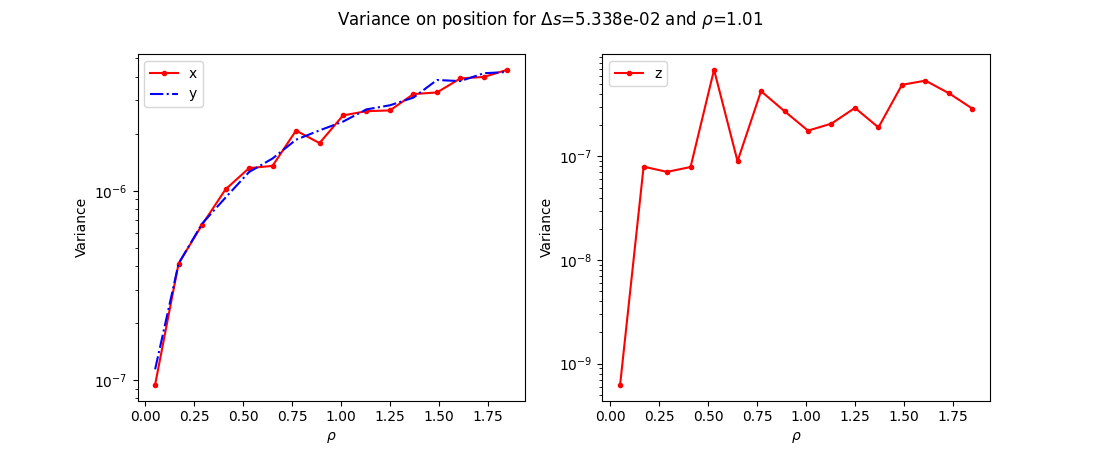

In [17]:
# Average x, y and z position
energyIndex = energies.size//2
stepsizeIndex = stepsizeArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 4], '.-r', label=f'x')
ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 5], '-.b', label=f'y')
ax1.set_xlabel('$\\rho$')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 6], '.-r', label=f'z')
ax2.set_xlabel('$\\rho$')
ax2.set_ylabel('Variance')
ax2.legend()